In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Sample of males in a heart-disease high-risk region of the Western Cape, South Africa
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

data = data.filter(items=['sbp','tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd'])
sbp = data['sbp']
tobacco = data['tobacco']
ldl = data['ldl']
adiposity = data['adiposity']
typea = data['typea']
obesity = data['obesity']
alcohol = data['alcohol']
age = data['age']
chd = data['chd']

data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


## EDA: by using numerical and visual Explaratory Data Analysis answer the following questions:
####- How much is the percentage of each class 0 and 1?
####- How many missing values do we have?
####- How many categorical variables you have in your features?
####- What features have the maximum corrolation?

Class 0 %: 65.36796536796537
Class 1 %: 34.63203463203463
# of missing values:  0
Number of categorical variables: 1
Features with maximum correlation (with the value): obesity  adiposity    0.716556
dtype: float64


<ipython-input-70-f3e55f8e8551>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  maximumCorrolation = data.corr().unstack().sort_values(ascending=False) # Correlation Matrix -> Turn Into 1D array -> Sort in descending order
<ipython-input-70-f3e55f8e8551>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(data.corr())


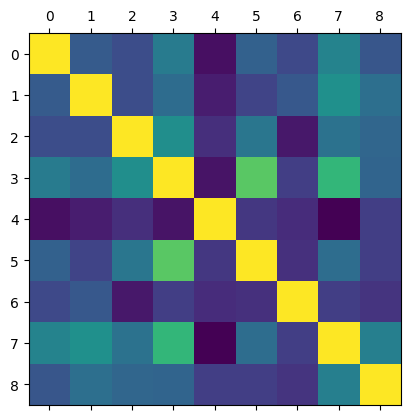

In [ ]:
# How much is the percentage of each class 0 and 1?
classCHD = chd.value_counts()

class0 = (classCHD[0] / len(data)) * 100
class1 = (classCHD[1] / len(data)) * 100

print("Class 0 %:", class0 )
print("Class 1 %:", class1)


# How many missing values do we have?
print("# of missing values: ", data.isnull().sum().sum())

# How many categorical variables you have in your features?
print("Number of categorical variables:", len(data.dtypes[data.dtypes == 'object']))

# What features have the maximum corrolation? (use correlation matrix in Python)

maximumCorrolation = data.corr().unstack().sort_values(ascending=False) # Correlation Matrix -> Turn Into 1D array -> Sort in descending order

maximumCorrolation = maximumCorrolation[maximumCorrolation != 1].head(1) # Remove Self to Self Correlation and return first row

print("Features with maximum correlation (with the value):", maximumCorrolation)

plt.matshow(data.corr())
plt.show()

## One-Hot-Encoding: Encode the categorical variable(s)
• Use one-hot-encoding function or get_dummies() to convert categorical
column(s) to appropriate format

In [ ]:
# One-Hot Encoding

hotData = pd.get_dummies(data['famhist'])
data = pd.concat([data, hotData], axis = 1)
data.drop(['famhist'], axis = 1, inplace = True)
absent = data['Absent']
present = data['Present']

## Standardization: Normalize all the other feature columns which are not categorical

In [ ]:
# Standardization
def Standardization(data, average, std):
    return (data - average) / std

standardData = Standardization(data, np.mean(data), np.std(data))
standardData.drop(['Absent','chd'], axis = 1, inplace = True)
standardData.insert(len(standardData.axes[1]),'Absent',absent)
standardData.insert(len(standardData.axes[1]),'chd', chd)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## Hypothesis (Model): Define the sigmoid function
S(z) = P (y = 1|x) = hθ(x) = ≡ σ(θ⊤x) = 1/(1+e^-z) where z = θ⊤x

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

## Cost Function: Define a function for calculating binary cross entropy loss function for a set of training examples with binary labels {(x(i), y(i)) : i = 1, ... , m}

In [ ]:
def loss(y,pred_y):
    return (-1/y.shape[0]) * (np.sum(y * np.log(sigmoid(pred_y)) + (1-y) * np.log(1 - sigmoid(pred_y))))

##Batch Gradient Descent Iteration: Define the function for updating the thetas (weights) iteratively

##Mini-batch Gradient Descent Iteration: Set the batch size to 50 samples. The last batch will just have 12 samples (because there are 462 samples in the dataset).

In [ ]:
# Batch Gradient Descent
def updateW(alpha, x, y, thetas):
    y_pred = sigmoid(np.dot(x, thetas)) # Find predicted using the sigmoid function
    error = y_pred - y # Find  error between predicted and true values
    gradient = (1/x.shape[0]) * np.dot(x.T, error) # Calculate gradient of the cost function with respect to the parameters # .shape[0] returns # of rows
    thetas -= alpha * gradient # Finish gradient descent
    return thetas # Return weights

# Mini-Batch Gradient Descent
def updateWB(alpha, x, y, thetas, batch=50):
    num_batches = x.shape[0] // batch # Find number of whole batches
    remainder = x.shape[0] % batch  # Find remaining batch

    for i in range(num_batches):
        start = i * batch # Find Starting Index
        final = start + batch # Find Final Index
        newX = x[start:final] # Extract Samples with respect to batch size
        newY = y[start:final]

        y_pred = sigmoid(np.dot(newX, thetas)) # Find predicted using the sigmoid function
        error = y_pred - newY # Find  error between predicted and true values
        gradient = (1/batch) * np.dot(newX.T, error) # Calculate gradient of the cost function with respect to the parameters
        thetas -= alpha * gradient # Finish gradient descent

    if remainder > 0: # If remaining samples
        start = num_batches * batch # Find starting index
        newX = x[start:]
        newY = y[start:]
        y_pred = sigmoid(np.dot(newX, thetas)) # Repeat above operations
        error = y_pred - newY
        gradient = (1/remainder) * np.dot(newX.T, error)
        thetas -= alpha * gradient

    return thetas # Return Weights

## Logistic Regression Functions for Batch and Mini-Batch

In [ ]:
# Logistic Regression Batch
def logReg(learn, x, y, epoch):
    a,b = x.shape # Get number of rows and columns of features
    x = np.c_[np.ones((a,1)),x] # Add Bias column by creating column of 1s and append to feature
    thetas = np.random.random(b+1) # Create array of randomized thetas
    errors = [] # List of errors
    for i in range(epoch): # For each epoch
        cost = loss(y, np.dot(x, thetas)) # Calculate the loss
        errors.append(cost) # Add loss to list
        theta = updateW(learn, x, y, thetas) # Update Thetas
    print(errors[-1])
    return thetas, errors # Return weights and error


# Logistic Regression Mini-Batch
def logRegMB(learn, x, y, epoch):
    a, b = x.shape # Get number of rows and columns of features
    x = np.c_[np.ones((a,1)),x] # Add Bias column
    thetas = np.random.random(b+1) # Randomize Thetas
    errors = [] # List of errors
    for i in range(epoch): # For each epoch
        cost = loss(y, np.dot(x, thetas)) # Calculate the loss
        errors.append(cost) # Add loss to list
        theta = updateWB(learn, x, y, thetas) # Update Thetas
    print(errors[-1])
    return thetas, errors # Return weights and error

## Intialization

In [ ]:
x = np.column_stack((standardData['sbp'], standardData['tobacco'], standardData['ldl'], standardData['adiposity'], standardData['typea'], standardData['obesity'], standardData['alcohol'], standardData['age'], standardData['Absent']))
#x = np.column_stack((standardData['sbp'], standardData['tobacco'], standardData['ldl'], standardData['adiposity'], standardData['typea'], standardData['obesity'], standardData['alcohol'], standardData['age'], standardData['Absent'], standardData['Present']))
y = chd

# Thetas are intialized in logistic regression functions
learning = [0.001, 0.0001]
epochs = [500, 1000, 10000]

## Batch Gradient Descent Iteration
Based on what you see in the learning curve, what value for epoch does seem
reasonable to stop training for each learning rates (cost will not decrease
significantly anymore)?

- For Learning Rate = 0.001, I believe when Epoch = 10000 is reasonable to stop training
- For Learning Rate = 0.0001, I believe when Epoch = 10000 is reasonable to stop training

### Batch Gradient Descent Learning Rate = 0.001 & Epocs = 500

0.7501113252089979
Weights:  [0.15216886 0.29279465 0.25671241 0.12516789 0.49249945 0.46448781
 0.37244224 0.47771248 0.06717146 0.21518221]


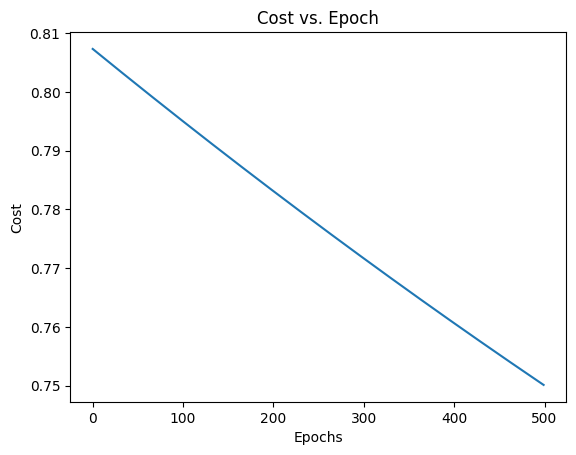

In [ ]:
weights, cost = logReg(learning[0], x, y, epochs[0])
print("Weights: ",weights)
plt.plot(cost)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Cost vs. Epoch")
plt.show()

### Batch Gradient Descent Learning Rate = 0.001 & Epocs = 1000

0.9260606221332192
Weights:  [ 0.4965433   0.52526852  0.38665415  0.78897893  0.77299962  0.27666357
 -0.07440277  0.62693297  0.0092805   0.63155623]


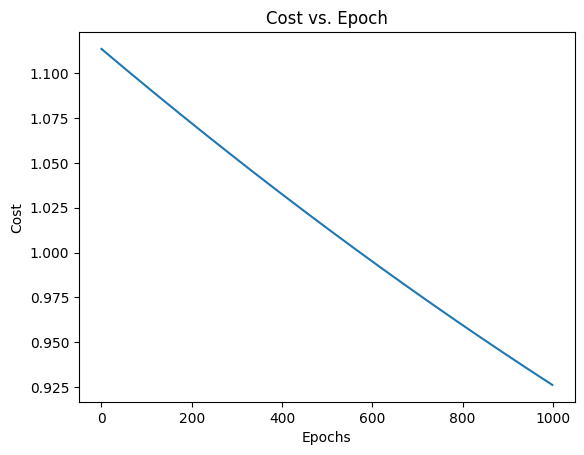

In [ ]:
weights, cost = logReg(learning[0], x, y, epochs[1])
print("Weights: ",weights)
plt.plot(cost)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Cost vs. Epoch")
plt.show()

### Batch Gradient Descent Learning Rate = 0.001 & Epocs = 10000

0.5277812823611081
Weights:  [-0.39378892  0.22803872  0.44044459  0.45730249  0.37545754  0.32400234
 -0.35039226  0.06910843  0.19202168 -0.46488995]


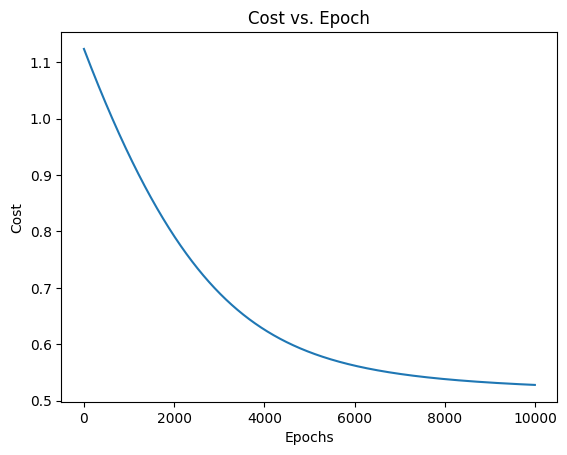

In [ ]:
weights, cost = logReg(learning[0], x, y, epochs[2])
print("Weights: ",weights)
plt.plot(cost)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Cost vs. Epoch")
plt.show()

### Batch Gradient Descent Learning Rate = 0.0001 & Epocs = 500

0.7561431181840196
Weights:  [0.38387177 0.02741845 0.50385696 0.88239261 0.18785818 0.61162521
 0.24759147 0.19398728 0.8848487  0.05282565]


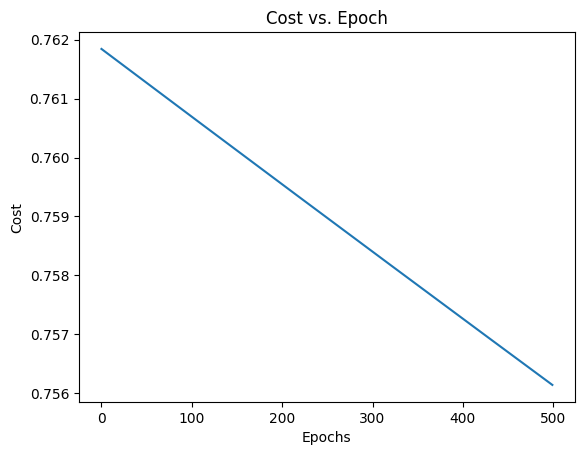

In [ ]:
weights, cost = logReg(learning[1], x, y, epochs[0])
print("Weights: ",weights)
plt.plot(cost)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Cost vs. Epoch")
plt.show()

### Batch Gradient Descent Learning Rate = 0.0001 & Epocs = 1000

0.8930671369183173
Weights:  [0.19934651 0.78476061 0.90436617 0.22108863 0.41150344 0.60762316
 0.74751137 0.75756691 0.43668711 0.19477335]


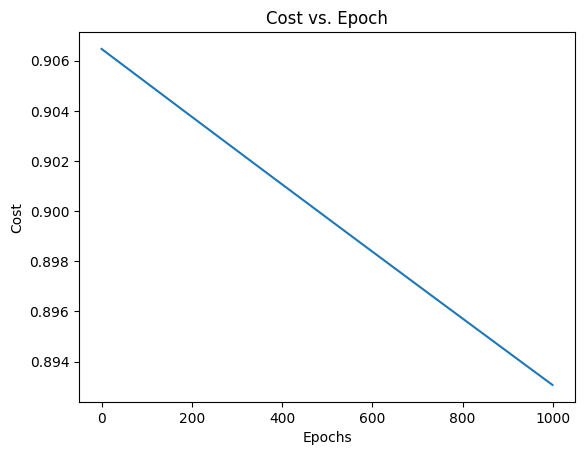

In [ ]:
weights, cost = logReg(learning[1], x, y, epochs[1])
print("Weights: ",weights)
plt.plot(cost)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Cost vs. Epoch")
plt.show()

### Batch Gradient Descent Learning Rate = 0.0001 & Epocs = 10000

1.0614406319554102
Weights:  [0.57070007 0.40054655 0.72916125 0.84174448 0.68516191 0.2125753
 0.53312619 0.76906724 0.70181978 0.58599817]


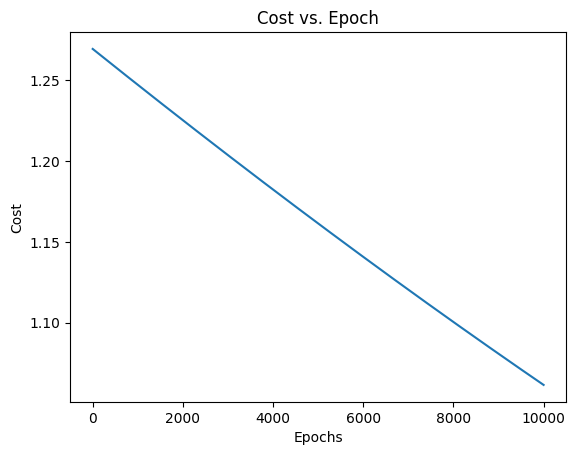

In [ ]:
weights, cost = logReg(learning[1], x, y, epochs[2])
print("Weights: ",weights)
plt.plot(cost)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Cost vs. Epoch")
plt.show()

## Mini-batch Gradient Descent Iteration
Based on what you see in the learning curve, what value for epoch does seem
reasonable to stop training for each learning rates (cost will not decrease
significantly anymore)?

- For Learning Rate = 0.001, I believe when Epoch = 1000 is reasonable to stop training
- For Learning Rate = 0.0001, I believe when Epoch = 10000 is reasonable to stop training

### Mini-batch Gradient Descent Learning Rate = 0.001 & Epocs = 500

0.6071210935909694
Weights:  [-0.29641922  0.38085764  0.18685339  0.63464154  0.02358885  0.47120206
  0.03338     0.46533347  0.34638714  0.08247441]


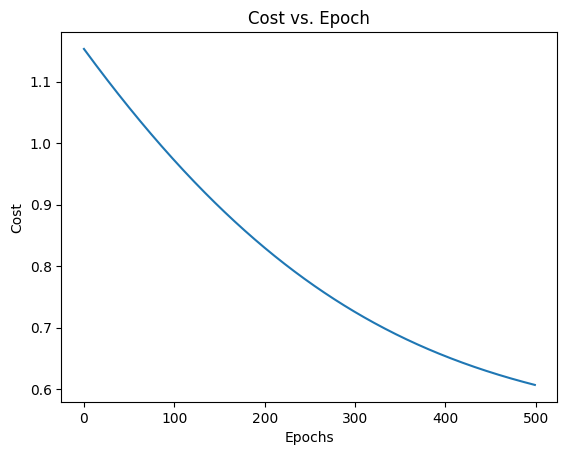

In [ ]:
weights, cost = logRegMB(learning[0], x, y, epochs[0])
print("Weights: ",weights)
plt.plot(cost)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Cost vs. Epoch")
plt.show()

### Mini-batch Gradient Descent Learning Rate = 0.001 & Epocs = 1000

0.5345311813679835
Weights:  [-0.55537949  0.21126124  0.43794516  0.23072085  0.44195047  0.2744562
 -0.32208634  0.06545225  0.23483518 -0.20892171]


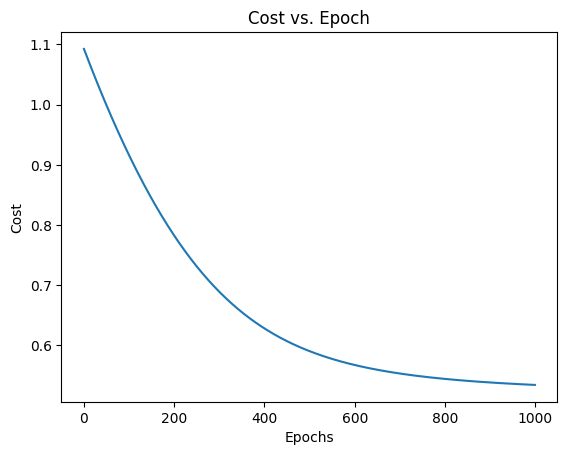

In [ ]:
weights, cost = logRegMB(learning[0], x, y, epochs[1])
print("Weights: ",weights)
plt.plot(cost)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Cost vs. Epoch")
plt.show()

### Mini-batch Gradient Descent Learning Rate = 0.001 & Epocs = 10000

0.5141091330612466
Weights:  [-0.33830269  0.07701715  0.34054132  0.28913551  0.35825487  0.2752159
 -0.37330272  0.014356    0.51255133 -0.81259016]


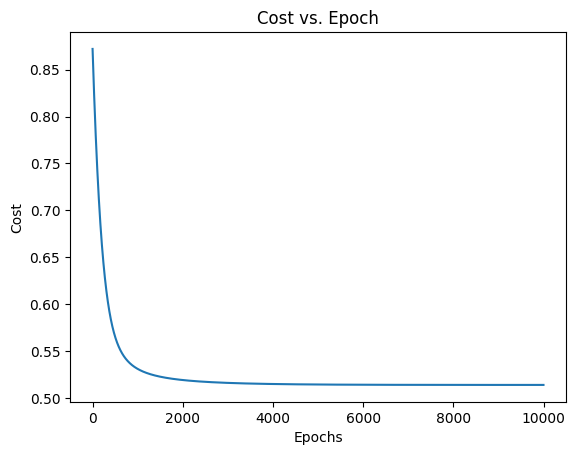

In [ ]:
weights, cost = logRegMB(learning[0], x, y, epochs[2])
print("Weights: ",weights)
plt.plot(cost)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Cost vs. Epoch")
plt.show()

### Mini-batch Gradient Descent Learning Rate = 0.0001 & Epocs = 500

1.0148818931270325
Weights:  [0.40198817 0.5877779  0.55282056 0.86565389 0.90055626 0.72422665
 0.23696379 0.89533947 0.72592613 0.4979198 ]


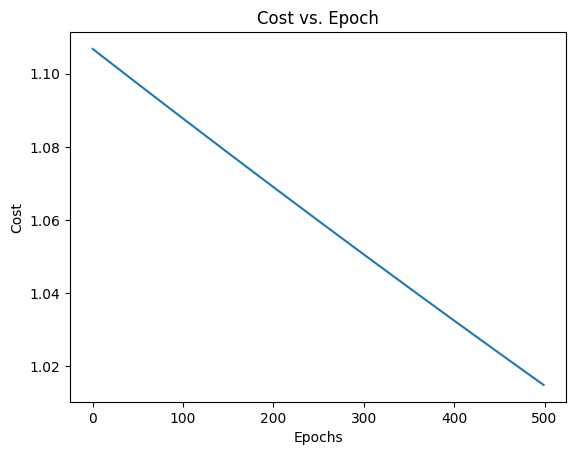

In [ ]:
weights, cost = logRegMB(learning[1], x, y, epochs[0])
print("Weights: ",weights)
plt.plot(cost)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Cost vs. Epoch")
plt.show()

### Mini-batch Gradient Descent Learning Rate = 0.0001 & Epocs = 1000

0.6706573626273583
Weights:  [-0.02599651  0.36372851  0.40485431  0.08732431  0.62572497  0.17732898
  0.2524567   0.21443688  0.38789593  0.00353635]


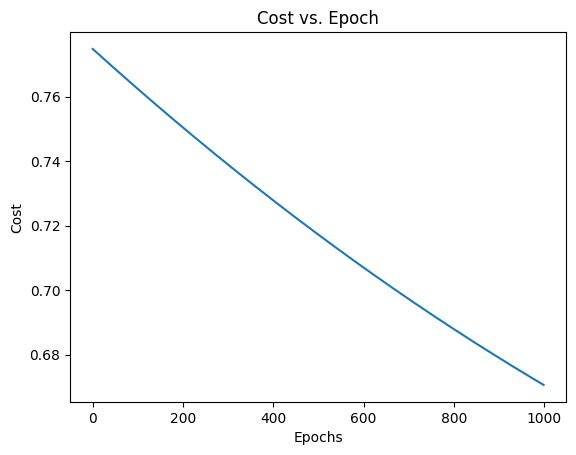

In [ ]:
weights, cost = logRegMB(learning[1], x, y, epochs[1])
print("Weights: ",weights)
plt.plot(cost)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Cost vs. Epoch")
plt.show()

### Mini-batch Gradient Descent Learning Rate = 0.0001 & Epocs = 10000

0.5341379728398177
Weights:  [-0.65928374  0.10868854  0.29388232  0.29593212  0.19491678  0.26196592
 -0.07979139  0.09525458  0.42073618 -0.10847563]


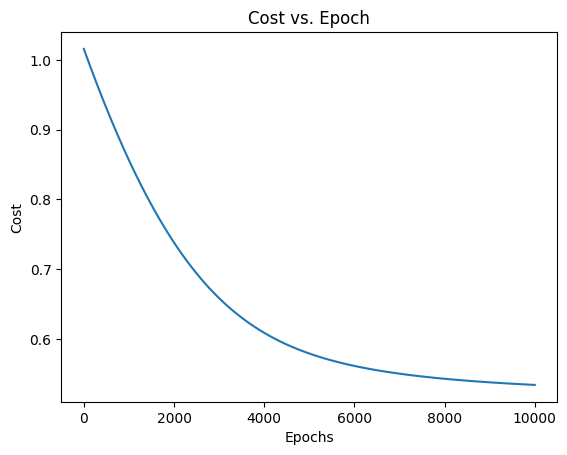

In [ ]:
weights, cost = logRegMB(learning[1], x, y, epochs[2])
print("Weights: ",weights)
plt.plot(cost)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Cost vs. Epoch")
plt.show()

# Compare with Implemented library

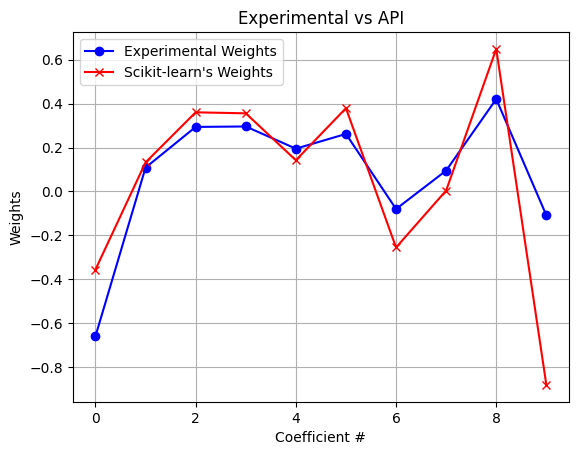

In [ ]:
# For this I used the latest coefficients, which was the mini-batch: Learning Rate = 0.0001 and Epoch = 10000

LogReg = LogisticRegression()
LogReg.fit(x, y)

plt.plot(range(len(weights)), weights, marker='o', label='Experimental Weights', color='blue')
plt.plot(range(len(LogReg.coef_[0]) + 1), np.insert(LogReg.coef_[0], 0, LogReg.intercept_[0]), marker='x', label="Scikit-learn's Weights", color='red')
plt.xlabel('Coefficient #')
plt.ylabel('Weights')
plt.title('Experimental vs API')
plt.legend()
plt.grid(True)
plt.show()